In [94]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('housing.csv')

In [4]:
df_fil = df.query("ocean_proximity ==  '<1H OCEAN' or ocean_proximity == 'INLAND'")

In [7]:
df_fil = df_fil.fillna(0)

In [96]:
_,train = train_test_split(df_fil,test_size=0.6,random_state=1)
test,val = train_test_split(_,test_size=0.5,random_state=1)

In [60]:
train_x = train.drop('median_house_value',axis=1)
train_y = train['median_house_value']

In [86]:
dv = DictVectorizer()
train_x_dv = dv.fit_transform(train_x.to_dict(orient='records'))
train_y_sclae = np.log10(train_y)

In [88]:
model = DecisionTreeRegressor(max_depth=1)
model.fit(train_x_dv,train_y_sclae)

DecisionTreeRegressor(max_depth=1)

[Text(0.5, 0.75, 'ocean_proximity=INLAND <= 0.5\nsquared_error = 0.06\nsamples = 9413\nvalue = 5.216'),
 Text(0.25, 0.25, 'squared_error = 0.035\nsamples = 5457\nvalue = 5.341'),
 Text(0.75, 0.25, 'squared_error = 0.044\nsamples = 3956\nvalue = 5.044')]

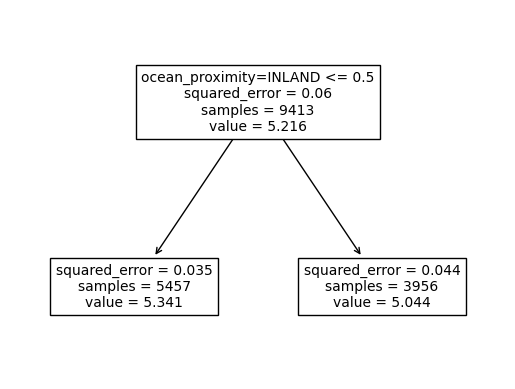

In [89]:
# Q1
tree.plot_tree(model,fontsize=10, feature_names=dv.get_feature_names_out())

In [93]:
# Q2
model = RandomForestRegressor(n_estimators=10,random_state=1,n_jobs=-1 )

In [95]:
model.fit(train_x_dv,train_y_sclae)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [108]:
val_x = val.drop('median_house_value',axis=1)
val_y = val['median_house_value']

val_x_dv = dv.transform(val_x.to_dict(orient='records'))
val_y_sclae = np.log10(val_y)
pred = model.predict(val_x_dv)
mean_squared_error(val_y_sclae,pred,squared=True)

0.011099731222617449

In [113]:
# Q3
for i in range(10,200,10):
    model = RandomForestRegressor(n_estimators=i,random_state=1,n_jobs=-1 )
    model.fit(train_x_dv,train_y_sclae)
    pred = model.predict(val_x_dv)
    print(i)
    print(mean_squared_error(val_y_sclae,pred,squared=True).round(3))

10
0.011
20
0.01
30
0.01
40
0.01


KeyboardInterrupt: 

In [118]:
# Q4
scoree_all = []
for o in [10, 15, 20, 25]:
    for i in range(10,200,10):
        model = RandomForestRegressor(n_estimators=i,max_depth=o,random_state=1,n_jobs=-1 )
        model.fit(train_x_dv,train_y_sclae)
        pred = model.predict(val_x_dv)
        score = mean_squared_error(val_y_sclae,pred,squared=True)
        scoree_all.append([o,i,score])

10
10
0.011465511940818218
10
20
0.011139744877311694
10
30
0.011005073673085883
10
40
0.011068622118090789
10
50
0.011033915952613788
10
60
0.011041939108981382
10
70
0.010999176985034814
10
80
0.010894923880038937
10
90
0.010855116538617855
10
100
0.010845467951663747
10
110
0.01083767073208192
10
120
0.010836255360431585
10
130
0.010830887596335112
10
140
0.010837417070573804
10
150
0.010841528408973037
10
160
0.010833620403370263
10
170
0.01083175189838103
10
180
0.01085063552725172
10
190
0.010866890470606003
15
10
0.0112079163910098
15
20
0.010485868499174805
15
30
0.010236055536666299
15
40
0.010208706840037057
15
50
0.010137182015959997
15
60
0.010126059628174266
15
70
0.010062699953946597
15
80
0.00995839663561264
15
90
0.00992902476012581
15
100
0.009920894725622608
15
110
0.009935306494778438
15
120
0.009937770666863395
15
130
0.009941820821333212
15
140
0.009949925031138484
15
150
0.009955753965730441
15
160
0.009952205722546676
15
170
0.009941505005530291
15
180
0.00995714

In [127]:
df_scoer = pd.DataFrame(scoree_all,columns=['depth','nnes','score'])
df_scoer.sort_values(by='score',ascending=False)

,depth,nnes,score
0,10,10,0.011466
19,15,10,0.011208
1,10,20,0.011140
57,25,10,0.011135
3,10,40,0.011069
...,...,...,...
66,25,100,0.009808
48,20,110,0.009807
65,25,90,0.009801
46,20,90,0.009796


In [132]:
# Q5
model = RandomForestRegressor(n_estimators=10,max_depth=20,random_state=1,n_jobs=-1)
model.fit(train_x_dv,train_y_sclae)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [157]:
df_score = pd.DataFrame([(dv.get_feature_names_out().tolist()),model.feature_importances_.tolist()]).T
df_score.columns = ['feature','score']
df_score.sort_values('score',ascending=False)

,feature,score
4,median_income,0.347511
6,ocean_proximity=INLAND,0.178479
5,ocean_proximity=<1H OCEAN,0.177443
2,latitude,0.092591
3,longitude,0.080703
1,housing_median_age,0.03391
7,population,0.030282
9,total_rooms,0.021925
0,households,0.019749
8,total_bedrooms,0.017408


In [158]:
import xgboost

In [177]:
# Q6
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,    
    'objective': 'reg:squarederror',
    'nthread': 8,    
    'seed': 1,
    'verbosity': 1,
    'epoch':100
}
train_dmatrix = xgboost.DMatrix(data = train_x_dv, label = train_y_sclae) 
test_dmatrix = xgboost.DMatrix(data = val_x_dv, label = val_y_sclae) 

watchlist  = [(train_dmatrix,'train'),(test_dmatrix,'val')]


model = xgboost.train(xgb_params,train_dmatrix,num_boost_round=100,evals=watchlist,verbose_eval=5)


[0]	train-rmse:0.19228	val-rmse:0.19022


[5]	train-rmse:0.10822	val-rmse:0.11478
[10]	train-rmse:0.09251	val-rmse:0.10484
[15]	train-rmse:0.08620	val-rmse:0.10146
[20]	train-rmse:0.08099	val-rmse:0.10022
[25]	train-rmse:0.07635	val-rmse:0.09881
[30]	train-rmse:0.07235	val-rmse:0.09779
[35]	train-rmse:0.06978	val-rmse:0.09715
[40]	train-rmse:0.06758	val-rmse:0.09687
[45]	train-rmse:0.06469	val-rmse:0.09659
[50]	train-rmse:0.06282	val-rmse:0.09663
[55]	train-rmse:0.06114	val-rmse:0.09652
[60]	train-rmse:0.05928	val-rmse:0.09679


c:\Users\B\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:160: UserWarning: [22:07:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "epoch" } are not used.

  warnings.warn(smsg, UserWarning)


[65]	train-rmse:0.05724	val-rmse:0.09647
[70]	train-rmse:0.05574	val-rmse:0.09631
[75]	train-rmse:0.05411	val-rmse:0.09619
[80]	train-rmse:0.05279	val-rmse:0.09617
[85]	train-rmse:0.05135	val-rmse:0.09590
[90]	train-rmse:0.05005	val-rmse:0.09591
[95]	train-rmse:0.04878	val-rmse:0.09590
[99]	train-rmse:0.04788	val-rmse:0.09596


In [178]:
# Q6
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,    
    'objective': 'reg:squarederror',
    'nthread': 8,    
    'seed': 1,
    'verbosity': 1,
    'epoch':100
}
train_dmatrix = xgboost.DMatrix(data = train_x_dv, label = train_y_sclae) 
test_dmatrix = xgboost.DMatrix(data = val_x_dv, label = val_y_sclae) 

watchlist  = [(train_dmatrix,'train'),(test_dmatrix,'val')]


model = xgboost.train(xgb_params,train_dmatrix,num_boost_round=100,evals=watchlist,verbose_eval=5)


[0]	train-rmse:0.22724	val-rmse:0.22423
[5]	train-rmse:0.16388	val-rmse:0.16349
[10]	train-rmse:0.13172	val-rmse:0.13439
[15]	train-rmse:0.11521	val-rmse:0.12057
[20]	train-rmse:0.10586	val-rmse:0.11358
[25]	train-rmse:0.09953	val-rmse:0.10925
[30]	train-rmse:0.09490	val-rmse:0.10647
[35]	train-rmse:0.09110	val-rmse:0.10415
[40]	train-rmse:0.08821	val-rmse:0.10198
[45]	train-rmse:0.08580	val-rmse:0.10086
[50]	train-rmse:0.08398	val-rmse:0.09991
[55]	train-rmse:0.08256	val-rmse:0.09943
[60]	train-rmse:0.08127	val-rmse:0.09912
[65]	train-rmse:0.08003	val-rmse:0.09883
[70]	train-rmse:0.07871	val-rmse:0.09836
[75]	train-rmse:0.07698	val-rmse:0.09789
[80]	train-rmse:0.07572	val-rmse:0.09765


c:\Users\B\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:160: UserWarning: [22:07:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "epoch" } are not used.

  warnings.warn(smsg, UserWarning)


[85]	train-rmse:0.07456	val-rmse:0.09732
[90]	train-rmse:0.07312	val-rmse:0.09680
[95]	train-rmse:0.07222	val-rmse:0.09672
[99]	train-rmse:0.07144	val-rmse:0.09669
